In [1]:
import torch
import random
import matplotlib.pyplot as plt
import numpy as np

from omegaconf import OmegaConf
from einops import rearrange
from pytorch_lightning import seed_everything
from ldm.models.diffusion.ddim import DDIMSampler
%matplotlib inline
# Proposal
from utils import *

In [2]:
# load baseline pipeline (stable diffusion)
ckpt = "./models/ldm/stable-diffusion-v1/model.ckpt"
config = OmegaConf.load("./configs/stable-diffusion/v1-inference.yaml")
model = load_model_from_config(config, f"{ckpt}")
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
model = model.to(device)
sampler = DDIMSampler(model)

Loading model from ./models/ldm/stable-diffusion-v1/model.ckpt
Global Step: 470000
LatentDiffusion: Running in eps-prediction mode
DiffusionWrapper has 859.52 M params.
making attention of type 'vanilla' with 512 in_channels
Working with z of shape (1, 4, 32, 32) = 4096 dimensions.
making attention of type 'vanilla' with 512 in_channels


Some weights of the model checkpoint at openai/clip-vit-large-patch14 were not used when initializing CLIPTextModel: ['vision_model.encoder.layers.5.self_attn.k_proj.bias', 'vision_model.encoder.layers.18.self_attn.v_proj.bias', 'vision_model.encoder.layers.14.mlp.fc2.weight', 'vision_model.encoder.layers.7.mlp.fc2.weight', 'vision_model.encoder.layers.6.self_attn.v_proj.bias', 'text_projection.weight', 'vision_model.encoder.layers.10.mlp.fc2.weight', 'vision_model.encoder.layers.2.self_attn.v_proj.weight', 'vision_model.encoder.layers.21.self_attn.v_proj.bias', 'vision_model.encoder.layers.19.mlp.fc2.weight', 'vision_model.encoder.layers.21.self_attn.v_proj.weight', 'vision_model.encoder.layers.10.layer_norm1.weight', 'vision_model.encoder.layers.1.layer_norm2.weight', 'vision_model.encoder.layers.8.layer_norm1.bias', 'vision_model.encoder.layers.14.mlp.fc2.bias', 'vision_model.encoder.layers.20.self_attn.out_proj.bias', 'vision_model.encoder.layers.1.mlp.fc1.weight', 'vision_model.en

In [3]:
seed_everything(1)
Collection = pixel_block_base(model, sampler, ['castle', 'lake', 'sky']) 
Collection.make_base(10)
# print(Collection.base['blocks'].shape, Collection.base.keys())

Global seed set to 1


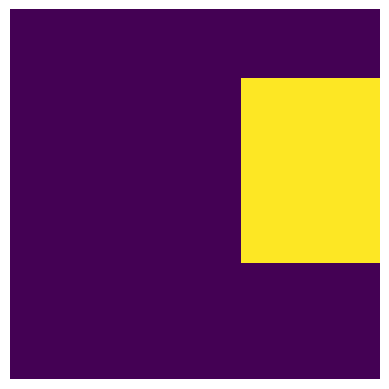

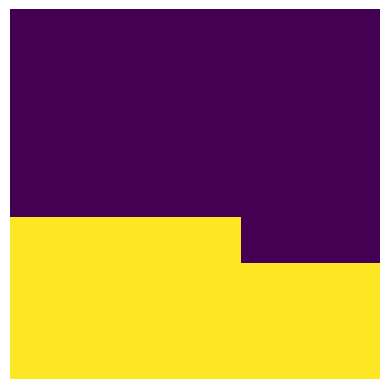

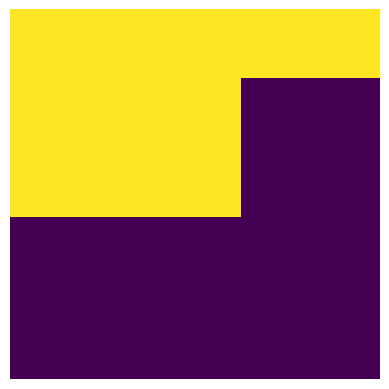

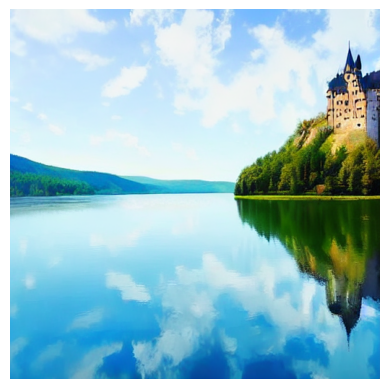

In [4]:
img, _  = Collection.product_image(['castle', 'lake', 'sky'], [[ 10,  3, 16, 11], [ 0,  9, 16, 16], [ 0,  0, 16, 9]], t_pos_1 = 0.4, t_bg_1 = 0.2, t_pos_2 = 0.4, t_neg_2 = 0.4, t_bg_2 = 0.2)
mask = rearrange(_, 'n (w h) -> n w h', w = 16)
for i in range(3):
    plt.imshow(mask[i])
    plt.axis('off')
    plt.show()

generate(model, sampler, img.cuda(), [['A magnificent castle stands atop a hill, overlooking a serene lake, The crystal-clear water reflects the majestic beauty of the castle and the surrounding forests,\
    The sky above is a stunning blue, dotted with fluffy white clouds, The landscape seems to be from another world, like a mystical fairyland waiting to be explored, fantasy, 8k, highly detailed']], ind=None)